# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


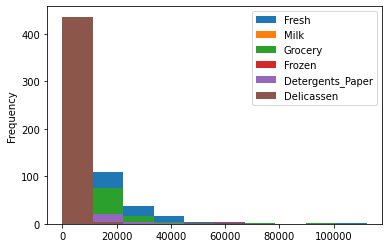

In [5]:
customers.drop(['Channel','Region'],axis=1).plot.hist()

In [6]:
# Your observations here
# There is a very high correlation between Detergents_paper and grocery
# No remarkable outliers to be removed.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [7]:
# Your code here
customers_clean = customers.copy()
customers_clean['Grocery and det_paper'] = customers_clean['Grocery'] + customers_clean['Detergents_Paper']
customers_clean.drop(columns=['Grocery','Detergents_Paper','Region','Channel'],inplace=True)
customers_clean.head()

,Fresh,Milk,Frozen,Delicassen,Grocery and det_paper
0,12669,9656,214,1338,10235
1,7057,9810,1762,1776,12861
2,6353,8808,2405,7844,11200
3,13265,1196,6404,1788,4728
4,22615,5410,3915,5185,8975


In [8]:
# Your comment here
# I combined Grocery and Detergents_paper due to their high correlation.
# I also dropped the categorical columns (Region and Channel), as they are different variables.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [8]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers_clean)
customers_scaled

array([[ 0.05293319,  0.52356777, -0.58936716, -0.06633906, -0.04265595],
       [-0.39130197,  0.54445767, -0.27013618,  0.08915105,  0.14473125],
       [-0.44702926,  0.40853771, -0.13753572,  2.24329255,  0.02620492],
       ...,
       [ 0.20032554,  1.31467078, -0.54337975,  0.12145607,  2.44411354],
       [-0.13538389, -0.51753572, -0.41944059,  0.21304614, -0.60174916],
       [-0.72930698, -0.5559243 , -0.62009417, -0.52286938, -0.55986177]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [10]:
# Your code here:
from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters = 3)
kmeans_5 = KMeans(n_clusters = 5)
kmeans_7 = KMeans(n_clusters = 7)
kmeans_3.fit(customers_scaled)
customers['labels_3'] = kmeans_3.labels_
customers_clean['labels_3'] = kmeans_3.labels_
kmeans_5.fit(customers_scaled)
customers['labels_5'] = kmeans_5.labels_
customers_clean['labels_5'] = kmeans_5.labels_
kmeans_7.fit(customers_scaled)
customers['labels_7'] = kmeans_7.labels_
customers_clean['labels_7'] = kmeans_7.labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_3,labels_5,labels_7
0,2,3,12669,9656,7561,214,2674,1338,1,4,0
1,2,3,7057,9810,9568,1762,3293,1776,1,4,4
2,2,3,6353,8808,7684,2405,3516,7844,1,0,4
3,1,3,13265,1196,4221,6404,507,1788,1,4,1
4,2,3,22615,5410,7198,3915,1777,5185,1,1,1


Count the values in `labels`.

In [11]:
# Your code here:
print(customers['labels_3'].value_counts())
print(customers['labels_5'].value_counts())
print(customers['labels_7'].value_counts())

1    394
0     44
2      2
Name: labels_3, dtype: int64
4    284
0     78
1     71
2      6
3      1
Name: labels_5, dtype: int64
0    224
1    103
4     85
6     14
2     11
3      2
5      1
Name: labels_7, dtype: int64


In [15]:
# I will grouop by the 3 clusters and look at the means:
customers_clean.drop(columns=['labels_5','labels_7']).groupby('labels_3').mean()

,Fresh,Milk,Frozen,Delicassen,Grocery and det_paper
labels_3,,,,,
0,10992.409091,20456.727273,2498.000000,2582.409091,41447.000000
1,11997.210660,4034.332487,2904.403553,1278.591371,7379.299492
2,34782.000000,30367.000000,48701.500000,26776.000000,17653.500000


In [16]:
customers_5 = customers_clean.drop(columns=['labels_3','labels_7']).groupby('labels_5').mean()
customers_5

,Fresh,Milk,Frozen,Delicassen,Grocery and det_paper
labels_5,,,,,
0,4980.512821,12816.807692,1698.538462,1818.076923,28689.525641
1,30103.577465,4439.211268,7986.591549,2297.507042,6317.112676
2,42995.666667,46395.500000,5824.666667,6233.666667,66880.666667
3,36847.000000,43950.000000,36534.000000,47943.000000,20409.000000
4,8660.126761,3215.278169,2044.485915,988.257042,5839.535211


In [17]:
customers_clean.drop(columns=['labels_5','labels_3']).groupby('labels_7').mean()

,Fresh,Milk,Frozen,Delicassen,Grocery and det_paper
labels_7,,,,,
0,6639.508929,2951.825893,2005.375000,869.258929,5123.388393
1,22953.611650,3710.543689,4395.563107,1768.339806,6058.398058
2,16911.090909,34864.363636,3245.454545,4177.363636,69134.272727
3,22015.500000,9937.000000,47939.000000,4153.500000,8515.500000
4,4777.541176,11224.423529,1533.305882,1717.423529,24405.341176
5,36847.000000,43950.000000,36534.000000,47943.000000,20409.000000
6,53976.285714,7539.571429,10804.285714,3279.142857,8742.428571


IndexError: index 5 is out of bounds for axis 0 with size 5

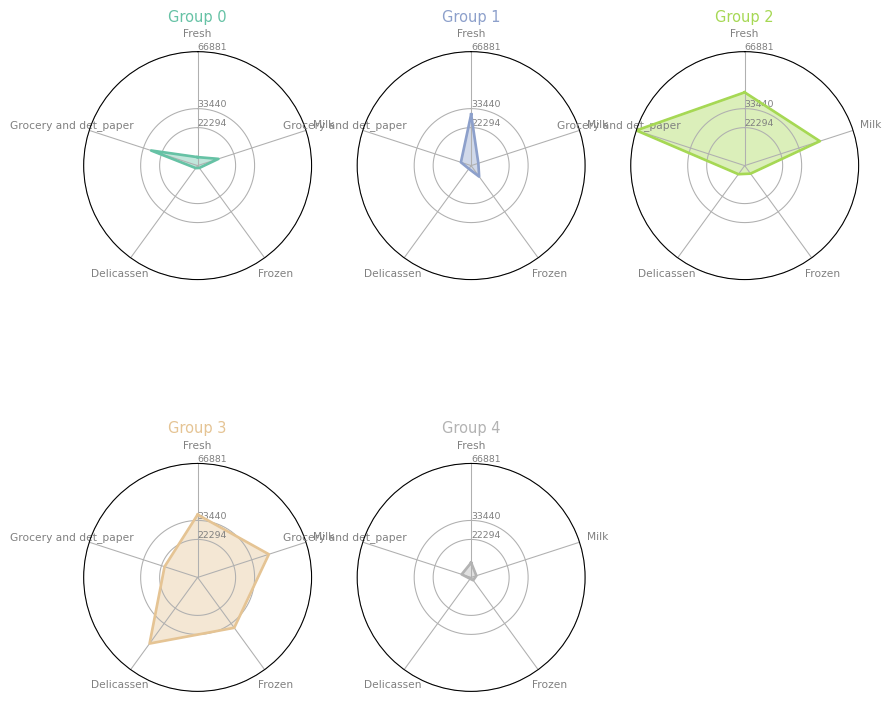

In [18]:
# I know plot the spider charts for k = 5:
from math import pi
def make_spider( row, title, color):
    # number of variable
    categories=list(customers_5)
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(2,3,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    m = round(customers_5.max().max())
    y_ticks = [round(m/3),round(m/2),m]
    plt.yticks(y_ticks, [str(t) for t in y_ticks], color="grey", size=7)
    plt.ylim(0,m)

    # Ind1
    values=customers_5.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
    
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(customers_5.index))
 
# Loop to plot
for row in range(0, len(customers.index)):
    make_spider(row=row, title='Group '+ str(customers_5.index[row]), color=my_palette(row))

In [19]:
# I know look at the efficiency for each K:
# k means determine k
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(customers_scaled)
    distortions.append(sum(np.min(cdist(customers_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / customers_scaled.shape[0])

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

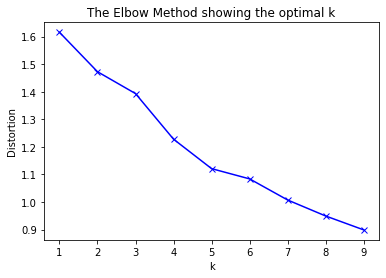

In [20]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [32]:
# Your code here
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scaled)
customers['labels_DBSCAN'] = dbscan.labels_
customers_clean['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [25]:
# Your code here
customers['labels_DBSCAN'].value_counts()

 0    304
-1    129
 1      7
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

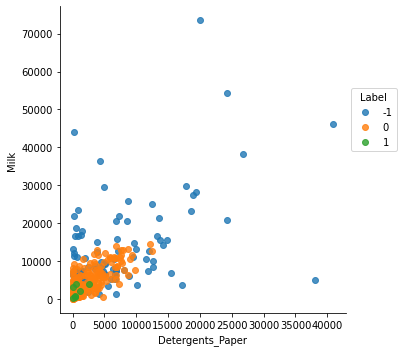

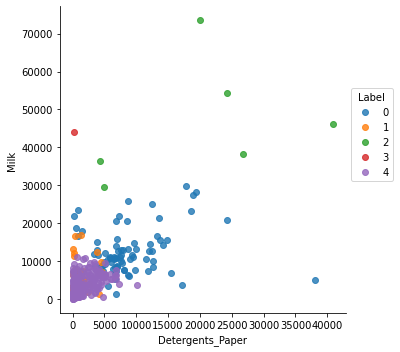

In [29]:
import seaborn as sns
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=customers, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Label", fancybox=True)
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=customers, x='Detergents_Paper', y='Milk', hue='labels_5', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Label", fancybox=True)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

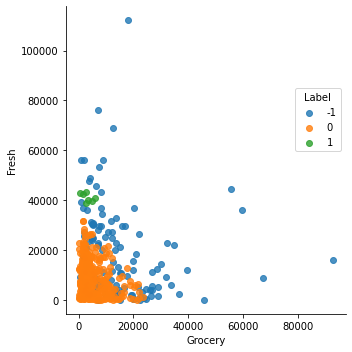

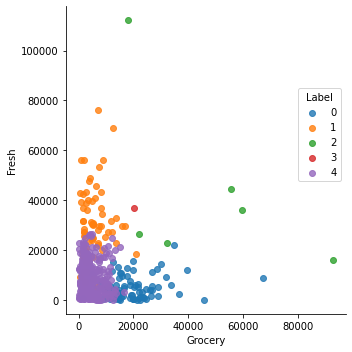

In [30]:
import seaborn as sns
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=customers, x='Grocery', y='Fresh', hue='labels_DBSCAN', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Label", fancybox=True)
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=customers, x='Grocery', y='Fresh', hue='labels_5', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Label", fancybox=True)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

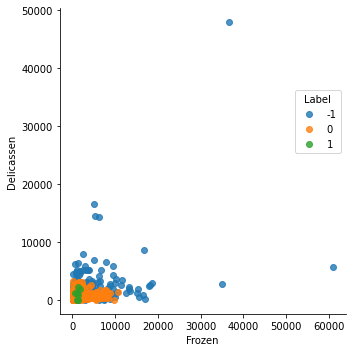

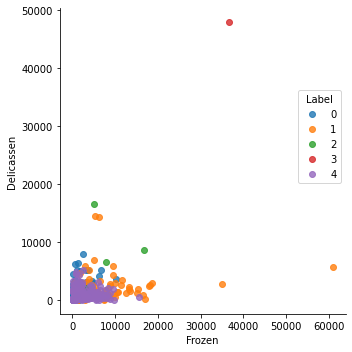

In [31]:
# Your code here:
import seaborn as sns
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=customers, x='Frozen', y='Delicassen', hue='labels_DBSCAN', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Label", fancybox=True)
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=customers, x='Frozen', y='Delicassen', hue='labels_5', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Label", fancybox=True)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [35]:
# Your code here:
customers_clean.drop(columns=['labels_3','labels_7']).groupby(['labels_5','labels_DBSCAN']).mean()

Fresh          Milk        Frozen  \
labels_5 labels_DBSCAN                                             
0        -1              5992.063830  14152.851064   2080.489362   
          0              3446.870968  10791.193548   1119.451613   
1        -1             30372.000000   5292.519231   9415.269231   
          0             22531.416667   2083.916667   5764.666667   
          1             41090.428571   2138.000000   1182.571429   
2        -1             42995.666667  46395.500000   5824.666667   
3        -1             36847.000000  43950.000000  36534.000000   
4        -1              8461.739130   6067.608696   4144.217391   
          0              8677.609195   2963.923372   1859.452107   

                          Delicassen  Grocery and det_paper  
labels_5 labels_DBSCAN                                       
0        -1              2326.574468           32465.042553  
          0              1047.129032           22965.354839  
1        -1              2750.942308            7454.961538  
          0              1053.083333            2833.083333  
          1              1062.428571            3837.142857  
2        -1              6233.666667           66880.666667  
3        -1             47943.000000           20409.000000  
4        -1              1896.000000           10189.826087  
          0               908.264368            5456.176245

Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here